In [131]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import binom
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.ticker as mticker

In [132]:
sns.set_style('darkgrid')
sns.set_palette("Blues_r")
sns.set(font_scale=1.20, rc={'figure.figsize':(12,6)})
sns.set_context(rc={"axes.facecolor": ".9", "axes.titlesize":16,"axes.labelsize":15})

## Normal approximation to the binomial

As the number $n$ get larger, the probability histogram of the binomial distribution looks more and more similar to the normal curve:

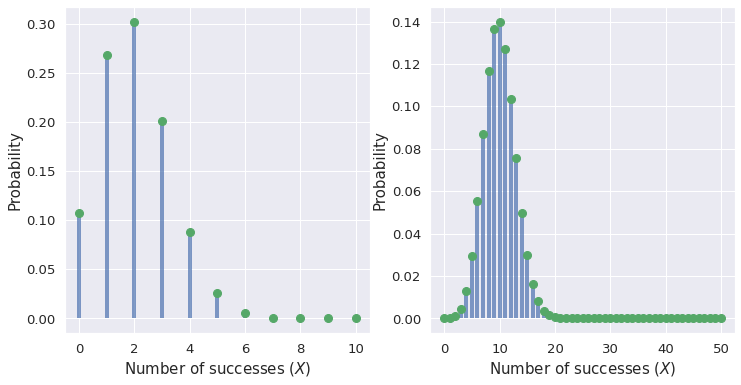

In [133]:

fig, ax = plt.subplots(1, 2)

n, p = 10, 0.2

x = np.arange(0, n+1)
pmf_x = binom.pmf(x, n, p)

ax[0].vlines(x, 0, binom.pmf(x, n, p), lw=4, alpha=0.7)
ax[0].set_xlabel(r'Number of successes ($X$)')
ax[0].set_ylabel(r'Probability')
g = ax[0].plot(x, pmf_x, 'go', ms=8)


n, p = 50, 0.2

x = np.arange(0, n+1)
pmf_x = binom.pmf(x, n, p)

ax[1].vlines(x, 0, binom.pmf(x, n, p), lw=4, alpha=0.7)
ax[1].set_xlabel(r'Number of successes ($X$)')
ax[1].set_ylabel(r'Probability')
g = ax[1].plot(x, pmf_x, 'go', ms=8)

In fact, we can approximate binomial probabilities using normal approximation:

to standardize, subtract off $np$ and then divide by $\sqrt{np(1-p)}$

In the previous example, we had $p=P$(win a small prize)=0.2.

Play $n$=50 times. What is $P$(at most 12 small prizes)?

We are interested in the sum of probabilites from $X=0$, $X=1$ up to $X=12$

But using the normal approximation, we can easily calculate

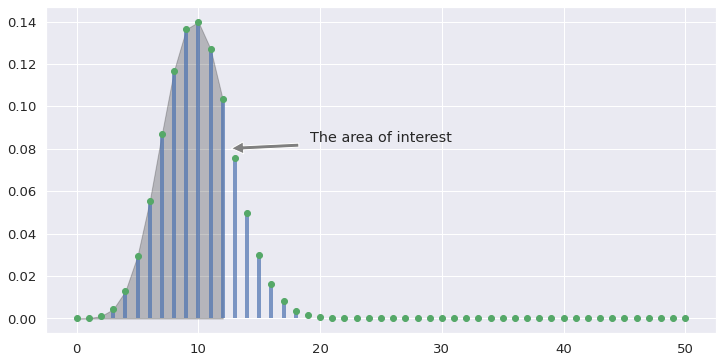

In [134]:

fig, ax = plt.subplots()

n, p = 50, 0.2

x = np.arange(0, n+1)
pmf_x = binom.pmf(x, n, p)


ax.vlines(x, 0, binom.pmf(x, n, p), lw=4, alpha=0.7)
ax.fill_between(x, pmf_x, where=x<=12, alpha=0.25, color='k')

ax.annotate("The area of interest", xy=(12, 0.08),  xycoords='data',
            xytext=(0.5, 0.6), textcoords='axes fraction',
            arrowprops=dict(facecolor='gray', shrink=0.1),
            horizontalalignment='center', verticalalignment='center',
            )
g = ax.plot(x, pmf_x, 'go')

Standardizing:

$\frac{12 - np}{\sqrt{np(1-p)}} = \frac{12 - 10}{\sqrt{10(1-0.2)}} = \frac{2}{2.83} = 0.71 $

Then the $12$ on the binomial histogram corresponds to $0.71$ in the normal curve

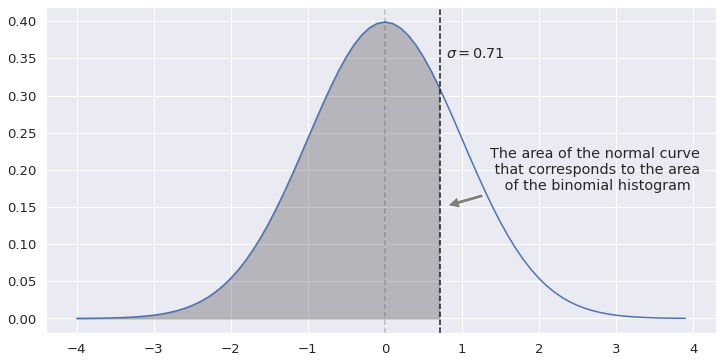

In [135]:

fig, ax = plt.subplots()

mu = 0
variance = 1
sigma = math.sqrt(variance)

x = np.arange(mu - 4*sigma, mu + 4*sigma, 0.1)
y = stats.norm.pdf(x, mu, sigma)

ax.plot(x, y)
kde_x, kde_y = ax.lines[0].get_data()

ax.axvline(0, color = 'k', linestyle="--", alpha=0.25)
ax.axvline(0.71, color = 'k', linestyle="--")


ax.annotate("The area of the normal curve\n that corresponds to the area\n of the binomial histogram", xy=(0.75, 0.15),  xycoords='data',
            xytext=(0.82, 0.5), textcoords='axes fraction',
            arrowprops=dict(facecolor='gray', shrink=0.1),
            horizontalalignment='center', verticalalignment='center',
            )

ax.annotate(r'$\sigma=0.71$',xy = (0.80, 0.35))

_ = ax.fill_between(x, y, where=x<=0.71, alpha=0.25, color='k')


Then the $P$(at most 12 small prizes) is equal to the value of this area in the normal curve which is roughly 76%.

## Sampling whitout replacement

A simple random sample selects subjects whitout replacement. 

This is not the binomial setting, because $p$ changes after a subject has been removed.

But if the population is much larger than the sample, then sampling with replacement is about the same as sampling without replacement.

Then the number of successes will have approximately the binomial distribution(and so it will approximately follow the normal curve).